# Gaussian Mixture Model (GMM): Motivation

The main question that we want to address is how to model an unknown distribution of data?

Simple Gaussian distributions are great for modeling distribution of data. But it has limitations modeling some real datasets.

Consider the example shown in the following Figure. This is known as the "Old Faithful" data set. It comprises 272 measurements of the eruption of the Old Faithful geyser at Yellowstone National Park in the USA. Each measurement comprises the duration of the eruption in minutes (horizontal axis) and the time in minutes to the next eruption (vertical axis).  

We see that the dataset forms **two dominant clumps**.

<img src="https://cse.unl.edu/~hasan/Pics/OldFaithful.png" width=300, height=300>

Hence, a simple Gaussian distribution is **unable to capture this structure**.

<img src="https://cse.unl.edu/~hasan/Pics/OldFaithful-SingleGaussian.png" width=300, height=300>

But a **linear superposition of two Gaussians** gives a better characterization of the data set. It has been fitted to the data by **Maximum Likelihood Estimation (MLE)**, which gives a better representation of the data.


<img src="https://cse.unl.edu/~hasan/Pics/OldFaithful-TwoGaussians.png" width=300, height=300>

Such superpositions, formed by taking linear combinations of more basic distributions such as Gaussians, can be formulated as probabilistic models known as mixture distributions. 

It is also called **Gaussian Mixture Model (GMM)**.

<img src="https://cse.unl.edu/~hasan/Pics/OldFaithful-TwoGaussians.png" width=300, height=300>

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. 

All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density, and orientation. When we observe an instance, we know it was generated from one of the Gaussian distributions, but we are not told which one, and we do not know what the parameters of these distributions are.


In a GMM model, we have to specify in advance the number $k$ of Gaussian distributions. The dataset $X$ is assumed to have been generated through the following probabilistic process:

- For each instance, a cluster is picked randomly from among $k$ clusters. The probability of choosing the $j$th cluster is defined by the cluster’s weight, $\phi^{(j)}$. The index of the cluster chosen for the $i$th instance is noted $z^{(i)}$.

- If $z^{(i)}=j$, meaning the $i$th instance has been assigned to the $j$th cluster, the location $x^{(i)}$ of this instance is sampled randomly from the Gaussian distribution with mean $\vec{μ}^{(j)}$ and covariance matrix $\vec \Sigma^{(j)}$. This is noted $\vec x^{(i)} \sim \mathcal{N}(\vec \mu^{(j)}, \vec \Sigma^{(j)}) $.

This is a **generative process**.

The **goal** of the GMM model is: given the dataset $X$ and the number $k$ of Gaussian distributions., we want to start by estimating the weights $\vec \phi$ and all the distribution parameters $\mu^{(1)}$ to $\mu^{(k)}$ and $\vec \Sigma^{(1)}$ to $\vec \Sigma^{(k)}$.



### GMM Parameter Learning: Expectation-Maximization (EM)

The GMM uses the **Expectation-Maximization (EM)** algorithm for Maximum Likelihood Estimation (MLE) to learn the model parameters $\vec \phi$, $\vec \mu$ and $\vec \Sigma$.

Unlike K-Means that makes hard cluster assignments, EM makes soft cluster assignments. It means that every data point is likely to belong to multiple clusters.

For each instance, during the expectation step, the algorithm estimates the probability that it belongs to each cluster (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called the responsibilities of the clusters for the instances. During the maximization step, each cluster's update will mostly be impacted by the instances it is most responsible for.



## Time-Complexity

The computational complexity of training a GMM depends on:
 - The number of instances $n$
 - The number of dimensions $d$
 - The number of clusters $k$

The time-complexity is: $O(knd^2 + knd^3)$


#### Thus, GMM does not scale to large numbers of features.


### Reducing Time-Complexity

We can reduce the time-complexity by **limiting the number of parameters** that the algorithm has to learn. 

One way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by **imposing constraints on the covariance matrices**.

For example, we can impose constraints on the type of covariance matrices as follows.
- Spherical
- Diagonal
- Tied

        Spherical: All clusters must be spherical, but they can have different diameters (i.e., different variances).

        Diagonal: Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).

        Tied: All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).


We can show that if the covariance type is "spherical" or "diagonal", then time-complexity is: $O(knd)$ 


## Tasks

In this notebook we use Scikit-Learn's **GaussianMixture** model to discover clusters in a **non-spherical** data distribution.

More specifically, we will investigate the following topics.
- Predict the Cluster Labels
- Model Parameters Estimated by the EM Algorithm
- Convergence
- Hard clustering vs Soft clustering
- GMM as a Generative model
- Estimating the Probability Density Function (PDF) at Any Location
- Reducing the Difficulty of Learning

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

## Synthetic Dataset

We will use Scikit-Learn's "make_blobs" function to generate **isotropic Gaussian blobs** for clustering. 

This function provides greater control regarding the centers and standard deviations of each cluster.

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

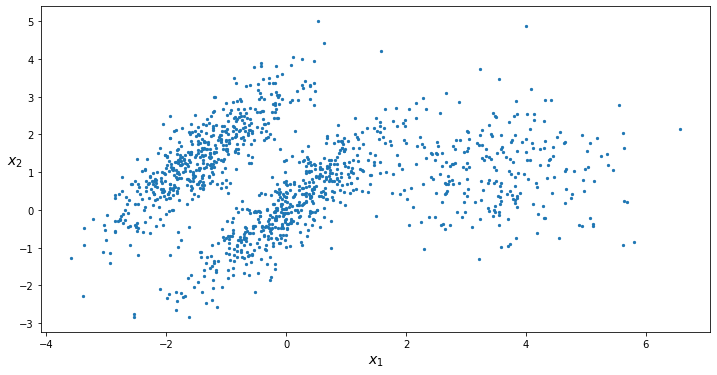

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='autumn')
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(12, 6))
plot_clusters(X)
plt.show()

## GMM

In [4]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

## Predict the Cluster Labels

We predict the labels for the data samples in $\vec X$ using trained model.

Then, plot the learned clusters using different colors.

[2 2 1 ... 0 0 0]


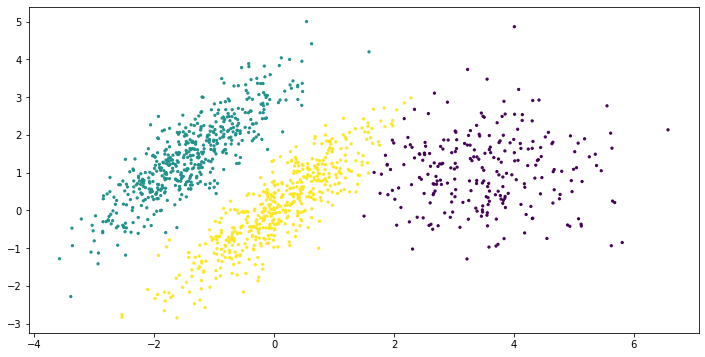

In [5]:
labels = gm.predict(X)

print(labels)

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');

##  Model Parameters Estimated by the EM Algorithm 


The GMM models uses the **Expectation-Maximization (EM)** algorithm to learn the model parameters weights $\vec \phi$, means $\vec \mu$ and covariances $\vec \Sigma$.

In [6]:
print("Weights: ", gm.weights_)

print("\nMeans:\n", gm.means_)

print("\nCovariances:\n", gm.covariances_)

Weights:  [0.20965228 0.4000662  0.39028152]

Means:
 [[ 3.39909717  1.05933727]
 [-1.40763984  1.42710194]
 [ 0.05135313  0.07524095]]

Covariances:
 [[[ 1.14807234 -0.03270354]
  [-0.03270354  0.95496237]]

 [[ 0.63478101  0.72969804]
  [ 0.72969804  1.1609872 ]]

 [[ 0.68809572  0.79608475]
  [ 0.79608475  1.21234145]]]


## Convergence

EM can end up converging to poor solutions.

Thus, it needs to be **run several times**, keeping only the best solution. 

This is why we set n_init to 10. By default n_init is set to 1.

In [7]:
print("Algorithm Convergred: ", gm.converged_)

print("\nNumber of Iterations: ", gm.n_iter_)

Algorithm Convergred:  True

Number of Iterations:  4


## Hard Clustering vs Soft Clustering

Unlike K-Means that performs hard clustering, GMM performs soft clustering. 

In other words, K-Means tells us what data point belong to which cluster but won’t provide us with the probabilities that a given data point belongs to each of the possible clusters.

We can use the GMM model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster.

- Use the predict() method for hard clustering
- Use the predict_proba() method for soft clustering

In [8]:
print("Hard Clustering Prediction: ", gm.predict(X))

print("\nSoft Clustering Prediction:\n", gm.predict_proba(X))

Hard Clustering Prediction:  [2 2 1 ... 0 0 0]

Soft Clustering Prediction:
 [[2.32389467e-02 6.77397850e-07 9.76760376e-01]
 [1.64685609e-02 6.75361303e-04 9.82856078e-01]
 [2.01535333e-06 9.99923053e-01 7.49319577e-05]
 ...
 [9.99999571e-01 2.13946075e-26 4.28788333e-07]
 [1.00000000e+00 1.46454409e-41 5.12459171e-16]
 [1.00000000e+00 8.02006365e-41 2.27626238e-15]]


## GMM: Generative Model

Gmm is a generative model. Thus, we can sample new instances from it (and get their labels).

Notice that they are sampled sequentially from each cluster.



In [9]:
X_new, y_new = gm.sample(6)

print("New Samples:\n", X_new)
print("\nLabels of New Samples:\n", y_new)

New Samples:
 [[ 2.95400315  2.63680992]
 [-1.16654575  1.62792705]
 [-1.39477712 -1.48511338]
 [ 0.27221525  0.690366  ]
 [ 0.54095936  0.48591934]
 [ 0.38064009 -0.56240465]]

Labels of New Samples:
 [0 1 2 2 2 2]


## Estimating the Probability Density Function (PDF) at Any Location

We can estimate the **log** of the probability density function (PDF) at any location using the score_samples() method.

        The greater the score, the higher the density.



In [10]:
print("Log of PDF:\n", gm.score_samples(X))

Log of PDF:
 [-2.60782346 -3.57106041 -3.33003479 ... -3.51352783 -4.39802535
 -3.80743859]


## Probability Densities (PDF) and Probabilities

If we compute the exponential of these scores, we get the value of the PDF at the location of the given instances. 

Note that these are not probabilities, but probability densities: 
- they can take on any positive value, not just a value between 0 and 1. 

To estimate the probability that an instance will fall within a particular region, we would have to integrate the PDF over that region.

If you do so over the entire space of possible instance locations, the result will be 1.

### PDF Integrates to 1

Let's check that the PDF integrates to 1 over the whole space. 

We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). 

The result is very close to 1:

In [11]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999217849

## Plot the Clusters & Density Regions

We use the following functions to show the cluster means, the decision boundaries (using dashed lines), and the density contours of the GMM model.

We also show the density regions.

In [12]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        

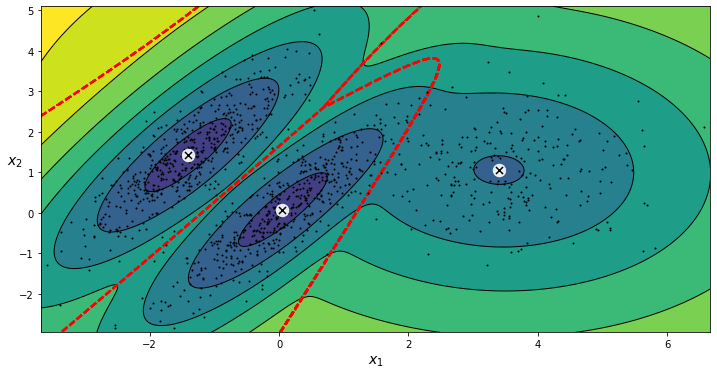

In [13]:
plt.figure(figsize=(12, 6))

plot_gaussian_mixture(gm, X)

plt.show()


## Observation

We see that the GMM algorithm clearly found an excellent solution. This is because:
- We made its task easy by generating the data using a set of 2D Gaussian distributions. 
- We also gave the algorithm the correct number of clusters. 


Unfortunately, real-life data is **not always so Gaussian and low-dimensional**. 

In general, EM can struggle to converge to the optimal solution when:

- There are many dimensions, or many clusters.
- There are few instances. 




### Reducing the Difficulty of Learning

We might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. 

One way to do this is to **limit the range of shapes and orientations** that the clusters can have. 

This can be achieved by imposing constraints on the covariance matrices. 

To do this, set the covariance_type hyperparameter to one of the following values:



- "full" (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

- "tied": all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).

- "spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).

- "diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).


By default, covariance_type is equal to "full", which means that each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix). 

For a comparative understanding, we plot the solutions found by the EM algorithm when covariance_type is set to: 
- "tied" or "spherical”
- "full" or "diagonal”

In [14]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [15]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

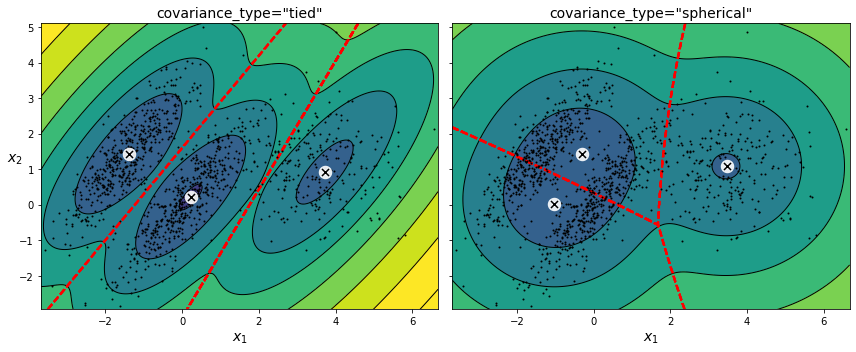

In [16]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.tight_layout()
plt.show()

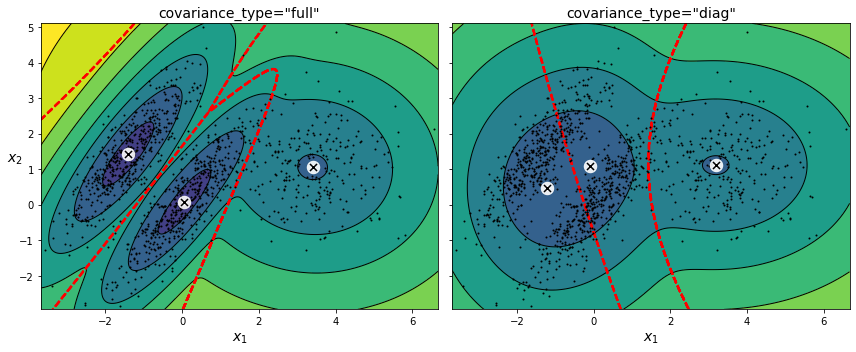

In [17]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()